# Cover Page 
### Student ID: 210003508
### Module Code: GG4257 
### Module Title: Urban Analytics: A Toolkit for Sustainable Urban Development
### Assignment: Lab Assignment No 2 - Networks, Geodemographics and Spatial Microsimulation.
### Degree Programme: Geography 
### Deadline Date: 02.04.2025

In submitting this assignment, I hereby confirm that:

I have read the University's statement on Good Academic Practice; that the following work is my own work; and that significant academic debts and borrowings have been properly acknowledged and referenced.

# Introduction 

This section outlines how to replicate the code and access the required data. All data will be available in a **OneDrive folder**, with the code provided in a dedicated GitHub repository.

This report documents the work conducted for **Lab Assignment 2**, covering challenges from **Labs 5, 6 and 7**. Each lab section includes problem descriptions, methods, and results. Code is supplemented with comments and markdown explanations, with screenshots of outputs (e.g., maps and graphs) included to ensure clarity and help replication. To meet GitHub size limits, certain output cells have been cleared from the notebook. All data paths in the code assume files are stored in a folder named "Data". 

#### GitHub Username: Ejarrett
#### GitHub Repository: [UA_Lab_Assignment_2](https://github.com/ejarrettt/UA_Lab_Assignment_2)
#### [OneDrive Folder](https://1drv.ms/f/c/46775ff05561cd60/EtpKCVLnUXtMupoCXG5G86QB-GfpojgYMR0f4hgJI-Fclg?e=bvGWOb)

To replicate this report:
1. Clone the GitHub repository.
2. Download the datasets from the [OneDrive Folder](https://1drv.ms/f/c/46775ff05561cd60/EtpKCVLnUXtMupoCXG5G86QB-GfpojgYMR0f4hgJI-Fclg?e=bvGWOb)
3. Unzip the folder and copy the "Data" folder to the same place you have stored the notebook. 
4. Run this notebook. 

# Lab No 5: Introduction to Networks (2 Challenges)

In [ ]:
# Install dependencies 
! pip install -r requirements.txt

In [ ]:
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
warnings.filterwarnings('ignore')

## Challenge 1:

It's time for you to apply everything you learned by analyzing a case study of FourSquare social Network. (Foursquare is a location-based online social network. The dataset contains a list of all of the user-to-user links)

Datasource: @inproceedings{gao2012exploring,
     title={Exploring social-historical ties on location-based social networks},
     author={Gao, Huiji and Tang, Jiliang and Liu, Huan},
     booktitle={Proceedings of the 6th International AAAI Conference on Weblogs and Social Media},
     year={2012}
}

- **Data**: `FS.csv` (avaliable in Moodle)

1. Read the FS network dataset.
2. Describe using the basic functions of the graph's size. Explore nodes and edges. Provide how many nodes and edges are present in the network.
3. The dataset generates a graph of 639.014 nodes, so it is massive and you won't see anything meaningful if you try to plot it. So you need to create a subset using the **degree centrality** to find out find the top 4 of the most important nodes, and use them to create a subset of the original network. 
4. Extract the degree centrality values and convert them into a list. Then, plot a histogram to visualize the distribution of node degrees in the original network.
5. Create a plot for the subset created.
6. Now calculate another relevant measure of the network -- **betweenness centrality**. Plot the betweenness centrality distribution of the subset you created. Tip: Same steps from the previous step, but use `nx.betweenness_centrality()`
7. Plot the Matrix, Arc and Circos from the subset.

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import nxviz as nv

/Users/elenajarrett/miniforge3/envs/ua/lib/python3.11/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


### Q1. Read the FS network dataset.

In [2]:
# Load Data
fs_network = pd.read_csv("/Users/elenajarrett/Library/CloudStorage/OneDrive-Personal/Year 4/GG4257/Data2/Data/data5/FS.csv")

# Print column names
print(fs_network.columns)

Index(['source', 'target'], dtype='object')


In [3]:
# Create Graph using correct column names
G = nx.from_pandas_edgelist(fs_network, source='source', target='target')

### Q2. Describe using the basic functions of the graph's size. Explore nodes and edges. Provide how many nodes and edges are present in the network.

In [4]:
print(len(G))# Tells you the size of the graph `T`, 
print(type(G.nodes())) # Tells you the type of `T.nodes()`
print(list(G.edges(data=True))[-1]) # Read the attributes associated with the last element of the edges list. 
print(list(G.nodes(data=True))[0]) # Read the attributes associated with the first element of the node list.
print(type(list(G.edges(data=True))[-1][2])) # Which type; therefore, you can see what you are reading.

639014
<class 'networkx.classes.reportviews.NodeView'>
(94306, 128953, {})
(34802, {})
<class 'dict'>


In [5]:
# Using len to read the size of the graph
print(f"The size of the graph is: {len(G)}")
# Using len to read the number of edges and nodes
print(f"The number of edges in the graph is: {len(G.edges())}")
print(f"The number of nodes in the graph is: {len(G.nodes())}")

The size of the graph is: 639014
The number of edges in the graph is: 3214986
The number of nodes in the graph is: 639014


### Q3. The dataset generates a graph of 639.014 nodes, so it is massive and you won't see anything meaningful if you try to plot it. So you need to create a subset using the **degree centrality** to find out find the top 4 of the most important nodes, and use them to create a subset of the original network.

In [6]:
nx.number_of_selfloops(G)
# There are no self-loops 

0

In [7]:
# Compute Degree Centrality
degree_centrality = nx.degree_centrality(G)

# Get the top 4 nodes with highest degree centrality
top_4_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:4]
print("Top 4 nodes with highest degree centrality:", top_4_nodes)

Top 4 nodes with highest degree centrality: [106223, 89302, 76517, 66999]


In [8]:
subset_G=G.edges([106223, 89302, 76517, 66999], data=True) 

In [9]:
G_sub = nx.DiGraph()
len(G_sub)

0

In [10]:
G_sub.add_edges_from(subset_G) #Adding the list from the subset of nodes.
len(G_sub)

106923

### Q4. Extract the degree centrality values and convert them into a list. Then, plot a histogram to visualize the distribution of node degrees in the original network.

In [16]:
# Extract the values and convert them into a list
centrality_list = list(degree_centrality.values())

# Print the list of degree centrality values
print(centrality_list[:10])

[7.355092932381658e-05, 4.694740169605313e-05, 4.068774813657938e-05, 2.8168441017631877e-05, 0.07191872465818379, 0.07142890676715496, 0.07275908314854314, 0.07176379823258681, 0.07139604358596774, 0.07170589643716169]


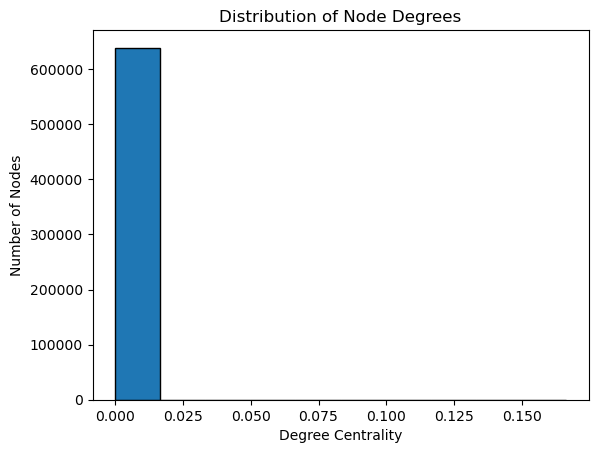

In [17]:
# Creating a histogram of degree centrality distribution
plt.hist(centrality_list, bins=10, edgecolor="black")
plt.xlabel("Degree Centrality")
plt.ylabel("Number of Nodes")
plt.title("Distribution of Node Degrees")
plt.show()

### Q5. Create a plot for the subset created.

In [ ]:
# Plot the graph
pos = nx.spring_layout(G_sub)
nx.draw(G_sub, pos, with_labels=True, node_size=700, node_color='skyblue')
plt.title('Subgraph with Top 4 Nodes by Degree Centrality')
plt.show()

### Q6. Now calculate another relevant measure of the network -- **betweenness centrality**. Plot the betweenness centrality distribution of the subset you created. Tip: Same steps from the previous step, but use `nx.betweenness_centrality()`

In [ ]:
# Creating an empty graph called git_network
G_network_subset = nx.Graph()
G_network_subset.add_edges_from(subset_G) # Adding the edges from git.edges

# This line here calculates the betweenness centrality for all the notes in "git" and stores them in a dictionary (called betweenness list)
betweenness_centrality = nx.betweenness_centrality(G_network_subset)

# Extracting degree centrality values as a list
betweenness_list = list(betweenness_centrality.values())

# Print the degree centrality list
#print(betweenness_list) # This outcome is quite long, as a note. 

In [ ]:
# I can use .hist to create a histogram based on the matplotlib library. 
plt.hist(betweenness_list, bins=5) 

# Setting labels and title
plt.xlabel("Betweenness Centrality")
plt.ylabel("Number of Nodes")
plt.title("Distribution of Betweenness Centrality")
plt.show

In [ ]:
# Making a graph as before. 
git_network_subset = nx.Graph()
git_network_subset.add_edges_from(subset_G)

# Getting betweenness centrality 
betweenness_centrality = nx.betweenness_centrality(G_network_subset)

# Plot the graph
pos = nx.spring_layout(G_network_subset)
nx.draw(G_network_subset, pos, with_labels=True, node_size=700, node_color='skyblue')
plt.title('Graph G_network_subset with Betweenness Centrality')
plt.show()

### Q7. Plot the Matrix, Arc and Circos from the subset.

In [ ]:
# Adjacency Matrix Plot
nv.MatrixPlot(G_sub)
plt.title("Adjacency Matrix of Subgraph")
plt.show()

In [ ]:
# Arc Diagram
plt.title("Arc Diagram of Subgraph")
a = nv.ArcPlot(G_sub)
plt.show()

In [ ]:
# Circos Plot
nv.CircosPlot(G_sub)
plt.title("Circos Plot of Subgraph")
plt.show()

## Challenge 2: 

This challenge is about OSMnx. You will explore and analyze a city's street network using the OSMnx Python library.

1. Use OSMnx to download the street network of a city of your choice. You can specify the city name, BBox or a Dict.
2. Calculate basic statistics for the street network, such as the number of nodes, edges, average node degree, etc.
3. Use OSMnx to plot the street network. Customize the plot to make it visually appealing, including node size, edge color. See the potential options here: https://osmnx.readthedocs.io/en/stable/user-reference.html#module-osmnx.plot
4. Utilize the routing capabilities of OSMnx to find the shortest path between two points in the street network. Plot the route on top of the street network.
5. Calculate the centrality measures (e.g., degree centrality and betweenness_centrality) for nodes in the street network.
6. Create the figure-groud from the selected city
7. Create interactive maps to plot nodes, edges, nodes+edges and one of the centrality measures.
8. Export the street network to a GeoPackage (.gpkg) file. Ensure that the exported file contains both node and edge attributes. Demonstrate that the new GeoPackage can be used and read in Python using any of the libraries we have seen in the class to create a simple and interactive map.
9. Finally, use OSMnx to extract other urban elements (e.g., buildings, parks) and plot them.

In [19]:
import osmnx as ox
import matplotlib.pyplot as plt
import warnings
import networkx as nx
import geopandas as gpd

### Q1. Use OSMnx to download the street network of a city of your choice. You can specify the city name, BBox or a Dict.

/Users/elenajarrett/miniforge3/envs/ua/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/elenajarrett/miniforge3/envs/ua/lib/python3.11/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/Users/elenajarrett/miniforge3/envs/ua/lib/python3.11/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


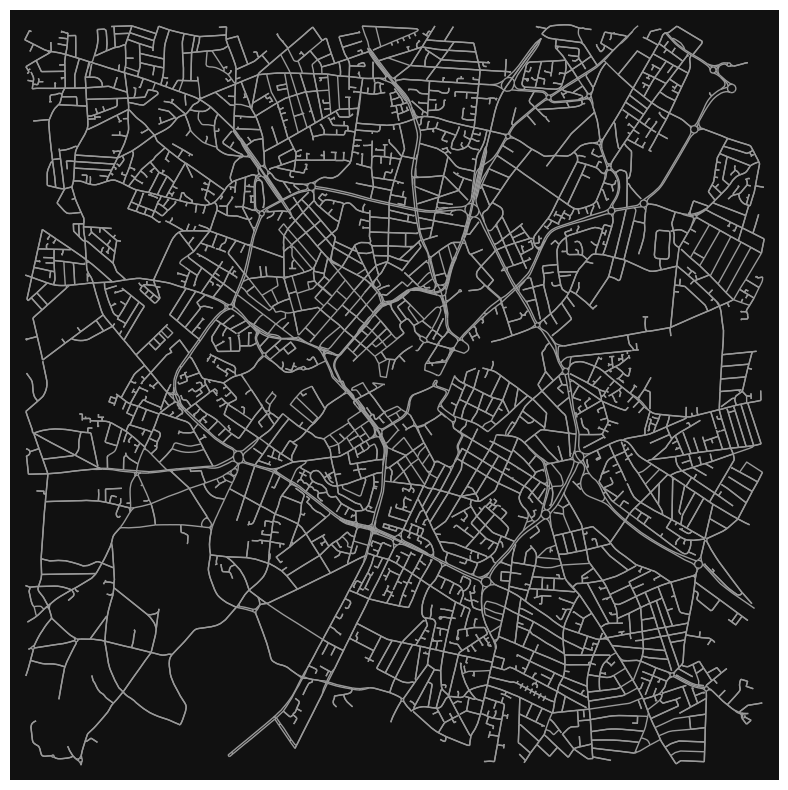

In [21]:
# Define Birmingham city centre (Birmingham New Street Station)
birmingham_centre = (52.4778, -1.8984)
two_miles = 3218.68  # meters

# Retrieve the street network for driving routes within one mile
G_birmingham = ox.graph_from_point(birmingham_centre, dist=two_miles, network_type="drive")

# Plot the graph
fig, ax = ox.plot_graph(G_birmingham, node_size=0, figsize=(10, 10))
plt.show()

In [22]:
# Conversion to a gdf
warnings.simplefilter('ignore', DeprecationWarning)

# Using graph to gdfs
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G_birmingham)
# Now there is a geodataframe (G_dub) that has the edges and the nodes. 

### Q2. Calculate basic statistics for the street network, such as the number of nodes, edges, average node degree, etc.

In [23]:
# Finding the area in meters of the map 
warnings.filterwarnings('ignore')
G_birmingham_proj = ox.project_graph(G_birmingham)
nodes_proj = ox.graph_to_gdfs(G_birmingham_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

40930940.0221529

In [24]:
# Basic statistics of the map 
ox.basic_stats(G_birmingham_proj, area=graph_area_m, clean_int_tol=15)

{'n': 4906,
 'm': 10589,
 'k_avg': 4.316754993885039,
 'edge_length_total': 906769.4759999964,
 'edge_length_avg': 85.63315478326531,
 'streets_per_node_avg': 2.5646147574398697,
 'streets_per_node_counts': {0: 0,
  1: 1259,
  2: 62,
  3: 3156,
  4: 415,
  5: 13,
  6: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.2566245413779046,
  2: 0.012637586628618018,
  3: 0.6432939258051366,
  4: 0.0845902975947819,
  5: 0.0026498165511618424,
  6: 0.00020383204239706482},
 'intersection_count': 3647,
 'street_length_total': 530916.8309999993,
 'street_segment_count': 6233,
 'street_length_avg': 85.17837814856398,
 'circuity_avg': 1.0373233936801751,
 'self_loop_proportion': 0.0014439274827530884,
 'clean_intersection_count': 2693,
 'node_density_km': 119.86042825658886,
 'intersection_density_km': 89.10130082588252,
 'edge_density_km': 22153.644052866337,
 'street_density_km': 12971.039285016497,
 'clean_intersection_density_km': 65.793749142885}

In [25]:
# Here, I can use .edges/.nodes and len() to print the number of nodes and edges; this is already included above with n and m, but this will make it extra clear. 
print(len(list(G_birmingham.edges)))
print(len(list(G_birmingham.nodes)))

10589
4906


### Q3. Use OSMnx to plot the street network. Customize the plot to make it visually appealing, including node size, edge color. See the potential options here: https://osmnx.readthedocs.io/en/stable/user-reference.html#module-osmnx.plot

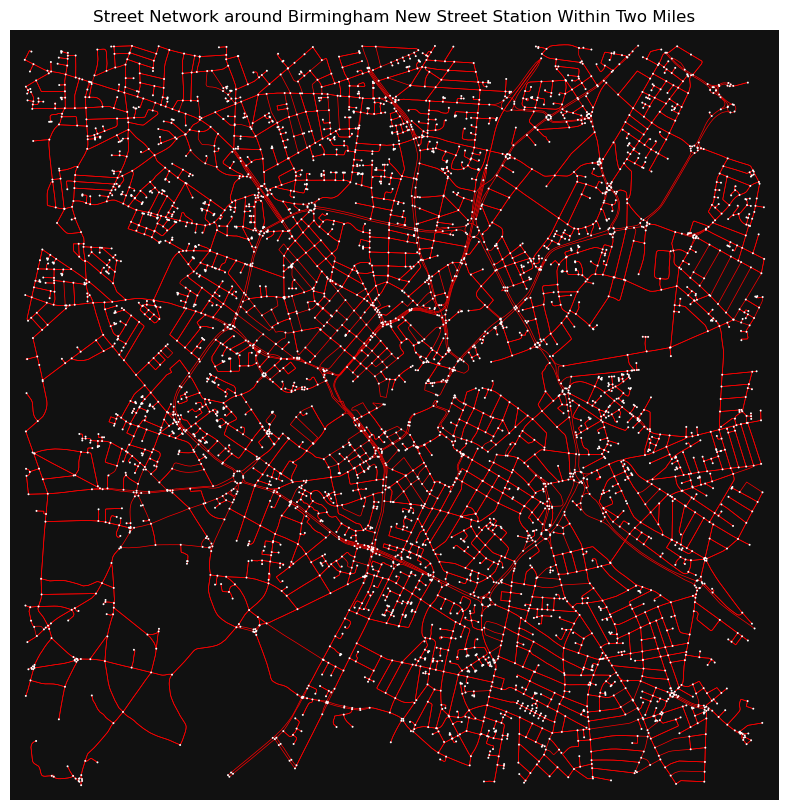

In [26]:
# Customizing the plot using matplotlib
fig, ax = ox.plot_graph(G_birmingham,
                         figsize=(10, 10),  # Adjusting figure size 
                         node_size=2,  # Increased the node size to 2 
                         edge_color="red",  # Made all the edges red for contrast
                         edge_linewidth=0.5,  # Made all the edges 0.5 thickness 
                         show=False)  # I'd like to add a title later. 

plt.title("Street Network around Birmingham New Street Station Within Two Miles")  # Adding a title

plt.show()  # Displaying the plot

### Q4. Utilize the routing capabilities of OSMnx to find the shortest path between two points in the street network. Plot the route on top of the street network.

In [27]:
# Using add_edge_speeds and travel times
G_birmingham = ox.speed.add_edge_speeds(G_birmingham)
G_birmingham = ox.speed.add_edge_travel_times(G_birmingham)

In [28]:
# Getting the nearest network nodes to two lat/lng points with the distance module
orig = ox.distance.nearest_nodes(G_birmingham, X=-1.8984, Y=52.4778)  # Birmingham New Street Station
dest = ox.distance.nearest_nodes(G_birmingham, X=-1.8881, Y=52.4862)  # Aston University

print(f"Origin Node: {orig}, Destination Node: {dest}")

Origin Node: 8004015735, Destination Node: 1126360561


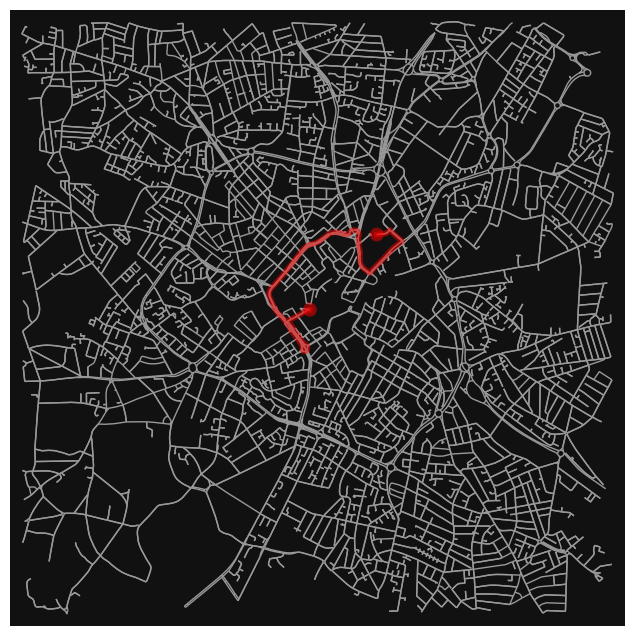

In [29]:
# finding the shortest path between nodes, minimizing travel time, then plotting it
route = ox.shortest_path(G_birmingham, orig, dest, weight="travel_time")
fig, ax = ox.plot_graph_route(G_birmingham, route, node_size=0)

In [30]:
# how long is our route in meters?
edge_lengths = ox.utils_graph.route_to_gdf(G_birmingham, route)["length"]
round(sum(edge_lengths))

4079

In [31]:
# how far is it between these two nodes?
# use OSMnx's vectorized great-circle distance (haversine) function
orig_x = G_birmingham.nodes[orig]["x"]
orig_y = G_birmingham.nodes[orig]["y"]
dest_x = G_birmingham.nodes[dest]["x"]
dest_y = G_birmingham.nodes[dest]["y"]
round(ox.distance.great_circle(orig_y, orig_x, dest_y, dest_x))

1094

COULD DO ELEVATION???? 

### Q5. Calculate the centrality measures (e.g., degree centrality and betweenness_centrality) for nodes in the street network.

In [34]:
# converting the graph to line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(G_birmingham))
nx.set_edge_attributes(G_birmingham, edge_centrality, "edge_centrality")

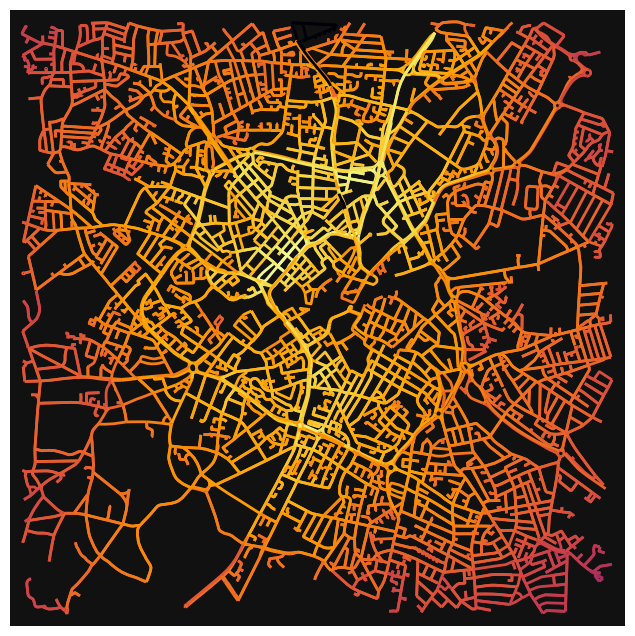

In [35]:
# colouring the edges in the original graph with closeness centralities from line graph
ec = ox.plot.get_edge_colors_by_attr(G_birmingham, "edge_centrality", cmap="inferno")
fig, ax = ox.plot_graph(G_birmingham, edge_color=ec, edge_linewidth=2, node_size=0)

In [36]:
# These lines here calculate the betweenness centrality for all the nodes in "G_dub" and stores them in a dictionary (called betweenness list)
betweenness_centrality = nx.betweenness_centrality(G_birmingham)

# Extracting betweenness_centrality values as a list
betweenness_list = list(betweenness_centrality.values())

# Print the betweenness centrality list
#print(betweenness_list) # This outcome is quite long, as a note, so feel free to remove the hashtag if you wish. 

In [ ]:
# converting the graph to line graph so edges become nodes and vice versa
betweenness_centrality = nx.betweenness_centrality(nx.line_graph(G_birmingham))
nx.set_edge_attributes(G_birmingham, betweenness_centrality, "betweenness_centrality")
# coloring the edges in original graph with betweenness centralities from line graph
ec = ox.plot.get_edge_colors_by_attr(G_birmingham, "betweenness_centrality", cmap="inferno")
fig, ax = ox.plot_graph(G_birmingham, edge_color=ec, edge_linewidth=2, node_size=0)

In [ ]:
# This line her|e calculates the degree centrality for all the nodes in "G_dub" and stores them in a dictionary (called degree-centrality)
degree_centrality = nx.degree_centrality(G_birmingham)

# Extracting degree centrality values as a list
centrality_list = list(degree_centrality.values())

# Print the degree centrality list
print(centrality_list) # This outcome is quite long, as a note. 

In [ ]:
# converting the graph to line graph so edges become nodes and vice versa
degree_centrality = nx.degree_centrality(nx.line_graph(G_birmingham))
nx.set_edge_attributes(G_birmingham, degree_centrality, "degree_centrality")
# coloring the edges in original graph with degree centralities from line graph
ec = ox.plot.get_edge_colors_by_attr(G_birmingham, "degree_centrality", cmap="inferno")
fig, ax = ox.plot_graph(G_birmingham, edge_color=ec, edge_linewidth=2, node_size=0)

### Q6. Create the figure-groud from the selected city

In [ ]:
from IPython.display import Image
# configure the inline image display
img_folder = "images"
extension = "png"
size = 300
dpi = 40

In [ ]:
# Define Birmingham as the new place
place = "birmingham"
point = (52.4778, -1.8984)  # Birmingham New Street Station

# Define street widths based on road types
street_widths = {
    "footway": 0.5,
    "steps": 0.5,
    "pedestrian": 0.5,
    "path": 0.5,
    "track": 0.5,
    "service": 2,
    "residential": 3,
    "primary": 5,
    "motorway": 6,
}

# Define output image settings
img_folder = "images"  # Adjust if needed
extension = "png"
dpi = 300  # High resolution
size = 500  # Adjust the display size

# File path for saving the image
fp = f"./{img_folder}/{place}.{extension}"

# Generate and save the figure-ground diagram
fig, ax = ox.plot_figure_ground(
    point=point,
    filepath=fp,
    network_type="all",
    street_widths=street_widths,
    dpi=dpi,
    save=True,
    show=False,
    close=True,
)

# Add the title to the plot
ax.set_title(place, fontsize=16, fontweight="bold", pad=15)

# Display the image
Image(fp, height=size, width=size)

### Q7. Create interactive maps to plot nodes, edges, nodes+edges and one of the centrality measures.

In [ ]:
# explore graph nodes interactively, with different basemap tiles
nodes = ox.graph_to_gdfs(G_birmingham, edges=False)
nodes.explore(tiles="cartodbpositron", marker_kwds={"radius": 8})

In [ ]:
# explore graph edges interactively, with a simple one-liner
ox.graph_to_gdfs(G_birmingham, nodes=False).explore()

In [ ]:
# explore nodes and edges together in a single map
nodes, edges = ox.graph_to_gdfs(G_birmingham)
m = edges.explore(color="skyblue", tiles="cartodbdarkmatter")
nodes.explore(m=m, color="yellow", marker_kwds={"radius": 6})

In [ ]:
# explore graph edges interactively, colored by length
edges.explore(tiles="cartodbdarkmatter", column="length", cmap="plasma")

In [ ]:
# explore graph nodes interactively, colored by betweenness centrality
nx.set_node_attributes(G_birmingham, nx.betweenness_centrality(G_birmingham, weight="length"), name="bc")
nodes = ox.graph_to_gdfs(G_birmingham, edges=False)
nodes.explore(tiles="cartodbdarkmatter", column="bc", marker_kwds={"radius": 8})

### Q8. Export the street network to a GeoPackage (.gpkg) file. Ensure that the exported file contains both node and edge attributes. Demonstrate that the new GeoPackage can be used and read in Python using any of the libraries we have seen in the class to create a simple and interactive map.

In [ ]:
# Save graph to disk as geopackage (for GIS)
ox.save_graph_geopackage(G_birmingham, filepath="data/birminghamnetwork.gpkg")

In [ ]:
# Read the GeoPackage file into a GeoDataFrame
gdf_nodes, gdf_edges = gpd.read_file("data/birminghamnetwork.gpkg", layer="nodes"), gpd.read_file("data/birminghamnetwork.gpkg", layer="edges")

In [ ]:
# Mapping both the edges and the nodes into one map using .explore
m = gdf_edges.explore(color="red", tiles="cartodbdarkmatter")
gdf_nodes.explore(m=m, color="skyblue", marker_kwds={"radius": 6})

### Q9. Finally, use OSMnx to extract other urban elements (e.g., buildings, parks) and plot them.

In [ ]:
warnings.simplefilter('ignore', DeprecationWarning)

# Define the central point of Birmingham (New Street Station) and the radius
birmingham_city_centre = (52.4778, -1.8984)
two_miles = 3218.68  # meters

# Get building footprints within a 2-mile radius
building_footprints = ox.geometries_from_point(
    birmingham_city_centre,
    tags={"building": True},
    dist=two_miles,
)

# Get road network (driving)
G_birmingham = ox.graph_from_point(
    birmingham_city_centre, 
    dist=two_miles, 
    network_type="drive"
)

# Get subway/rail network using a railway filter
G_rail = ox.graph_from_point(
    birmingham_city_centre, 
    dist=two_miles, 
    network_type="all", 
    custom_filter='["railway"~"subway|light_rail|tram|rail"]'
)

# Create a unified plot
fig, ax = plt.subplots(figsize=(12, 10))

# Plot road network in gray
ox.plot_graph(G_birmingham, ax=ax, node_size=0, edge_color="gray", edge_linewidth=0.5, show=False)

# Plot railway network in red
ox.plot_graph(G_rail, ax=ax, node_size=0, edge_color="red", edge_linewidth=1.0, show=False)

# Plot building footprints in yellow
building_footprints.plot(ax=ax, facecolor="yellow", edgecolor="none", alpha=0.8)

# Set title and hide axes
ax.set_title("Birmingham City Centre: Roads, Railways, and Buildings", fontsize=16, fontweight="bold", pad=15)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Show final plot
plt.show()


In [ ]:
# Defining the point of interest (Birmingham New Street Station)
birmingham_city_centre = (52.4778, -1.8984)
two_miles = 3218.68  # meters

# Extracting the building footprints within a 2-mile radius of Birmingham New Street
building_footprints = ox.geometries_from_point(
    birmingham_city_centre,
    tags={"building": True},
    dist=two_miles,
)

# Plotting the road network graph
G_birmingham = ox.graph_from_point(birmingham_city_centre, dist=two_miles, network_type="drive")
fig, ax = ox.plot_graph(G_birmingham, node_size=0, show=False)

# Plotting the building footprints using .plot
building_footprints.plot(ax=ax, facecolor='yellow', alpha=1)  # Highlight buildings in yellow

# Show the plot
plt.show()

# get a subway rail network
G = ox.graph_from_place(
    "Edinburgh, UK",
    retain_all=False,
    truncate_by_edge=True,
    simplify=True,
    custom_filter='["railway"]',
)

fig, ax = ox.plot_graph(G, node_size=0, edge_color="w", edge_linewidth=0.2)

# get all building footprints in some neighborhood
place = "Leith, Edinburgh, UK"
tags = {"building": True}
gdf = ox.features_from_place(place, tags)
gdf.shape

warnings.simplefilter('ignore', DeprecationWarning)

fig, ax = ox.plot_footprints(gdf, figsize=(12, 10))

# Lab No 6: Geodemographics (1 Challenge)

## Challenge 1: Geodemographic Classification

In this challenge, you will replicate the process of creating a geodemographic classification using the k-means clustering algorithm. Please select any city in the UK except London, Liverpool, or Glasgow. The main goal is to generate a meaningful and informative classification that captures the diversity of areas in your dataset using the census data ( For England, you can try to use the 2021 or 2011 census, and for Scotland, you need to use the 2011 census data) 

1. Define the main goal for the geodemographic classification (marketing, retail and service planning). 
2. Look for census data from the selected city for which you would like to generate the geodemographic classification.
3. The census data at the Output Area OA level. Select multiple topics of at least four topics (socio-demographics, economics, health, and so on). Describe your topic selection accordingly based on the goal of your geodemographic classification. For example, if your geodemographics are related to marketing, Economic variables might be the appropriate selection. 
4. Identify the variables that will be crucial for effectively segmenting neighbourhoods. Evaluate how this choice may impact the classification results, including a DEA analysis.
5. Prepare, adjust or clean the dataset addressing any missing values or outliers that could distort the clustering results.
6. Include standardisation between areas and variables. Make an appropriate analysis and adjust the variable selection accordingly for any multicollinearity.
7. Utilize the k-means clustering algorithm to create a classification based on the selected variables.
8. Define the optimum number of clusters (i.e., using the Elblow method). Experiment with different values of k.
9. Evaluate your cluster groups (e.g., using PCA) and interpret your cluster centres. Describe your results and repeat the process to adjust the variable selection and cluster groups to provide more meaningful results for your geodemographic goal. Interpret the characteristics of each cluster. What demographic patterns or similarities are prevalent within each group?
10. Map the final cluster groups
11. Finish the analysis by naming the final clusters and plotting a final map that includes the census values and the provided names.
12. Finally, acknowledge the subjective nature of classification and make analytical decisions to produce an optimum classification for your specific purpose. Reflect on the challenges and insights gained during the classification process. Ensure you document your analytical decisions and the rationale behind any important decision. Once your geodemographics are constructed, describe the potential use cases for the geodemographic classification you have built based on your initial goal.

### Q1. Define the main goal for the geodemographic classification (marketing, retail and service planning). 

The objective of this geodemographic classification is to assist in **retail planning** in Birmingham. This classification will help businesses understand the socio-economic and demographic characteristics of different neighbourhoods to make data-driven decisions on store locations, targeted marketing, and service provision.

### Q2. Look for census data from the selected city for which you would like to generate the geodemographic classification.

We will use **England's 2021 Census Data** at the **Output Area (OA) level** for Birmingham. The dataset includes various demographic and socio-economic indicators essential for segmenting urban areas into meaningful clusters.

I found bulk census data for Output Areas in England based on the 2021 census from [NOMIS](https://www.nomisweb.co.uk/sources/census_2021_bulk). I then downloaded the data for the variables below as csv files. 

Additionally, I found the output area classification shapefile for the entire UK from the following source: https://data.cdrc.ac.uk/dataset/output-area-classification-2011#data-and-resources. I also used local planning authority boundaries from a previously used shapefile from Lab No 2. 

### Q3. The census data at the Output Area OA level. Select multiple topics of at least four topics (socio-demographics, economics, health, and so on). Describe your topic selection accordingly based on the goal of your geodemographic classification. For example, if your geodemographics are related to marketing, Economic variables might be the appropriate selection. 

To ensure a comprehensive geodemographic classification, we will incorporate variables from the following four broad topics:
   - **Socio-demographics**: Age distribution, household composition, ethnicity, migration patterns
   - **Economics**: Employment status, occupation types, income levels
   - **Health**: General health status, disability prevalence
   - **Housing & Living Conditions**: Housing tenure, overcrowding, access to essential services

These topics align with our objective as they influence purchasing power, service needs, and consumer behaviour.

In [13]:
import pandas as pd
import os

csv_directory = "/Users/elenajarrett/Library/CloudStorage/OneDrive-Personal/Year 4/GG4257/Data2/Data/data6/census_raw_data/"

# We need a list of all CSV files in the folder
csv_files = [file for file in os.listdir(csv_directory) if file.endswith(".csv")]

# An empty DataFrame to store the merged data
merged_data = pd.DataFrame()

# Loop through each CSV file
for csv_file in csv_files:
    csv_path = os.path.join(csv_directory, csv_file) # We create a consistent path
    df_csv = pd.read_csv(csv_path, low_memory=False) #read each file
    # Concatenate/Merge all columns, there is a pitfall here, you will get a duplicate oa_code from all csv files.
    merged_data = pd.concat([merged_data, df_csv], axis=1)

# Save the merged dataset. You might want to do some pre-processing.
merged_data.to_csv("/Users/elenajarrett/Library/CloudStorage/OneDrive-Personal/Year 4/GG4257/Data2/Data/data6/census_raw_data/merged_census_data.csv", index=False)
# Be aware of the mixted dtype you are importing we unfortunatly have to deal with that later.
# eventually you can avoid this to define the dtype on import method.

In [20]:
# Defining the bounds of Birmingham 
import geopandas as gpd
UK_LPA = "/Users/elenajarrett/Library/CloudStorage/OneDrive-Personal/Year 4/GG4257/Data2/Data/data6/LAP_2021/LPA_MAY_2021_UK_BUC_V2.shp" # This is the shapefile for all the local planning authorities in the UK
gdf_UK_LPA = gpd.read_file(UK_LPA) # Reading it into a geodataframe from the shapefile
birmingham_lpa_gdf = gdf_UK_LPA[gdf_UK_LPA.LPA21NM == "Birmingham LPA"] # This filters the LPAs by name, specifically Birmingham. 

# Defining the output areas in UK 
oa_shapefile = gpd.read_file("/Users/elenajarrett/Library/CloudStorage/OneDrive-Personal/Year 4/GG4257/Data2/Data/data6/2011_OAC.shp")

# Clipping the OAs to Birmingham city using .clip 
birmingham_oa = gpd.clip(oa_shapefile, birmingham_lpa_gdf)
# Saving it to a file
birmingham_oa.to_file("/Users/elenajarrett/Library/CloudStorage/OneDrive-Personal/Year 4/GG4257/Data2/Data/data6/birmingham_oa.shp", driver='ESRI Shapefile') # Saving it as a shapefile to the folder, which is the file I provided for you. 


For the geodemographic classification, we will use the following 2021 Census datasets:
   - **TS001**: Number of usual residents in households and communal establishments
   - **TS006**: Population density
   - **TS008**: Sex 
   - **TS007A**: Age by five-year age bands
   - **TS011**: Households by deprivation dimensions
   - **TS021**: Ethnic group
   - **TS029**: Proficiency in English
   - **TS037**: General health
   - **TS038**: Disability
   - **TS041**: Number of households
   - **TS054**: Tenure
   - **TS058**: Distance travelled to work
   - **TS063**: Occupation
   - **TS066**: Economic activity status
   - **TS067**: Highest level of qualification
   - **TS068**: Schoolchildren and full-time students

In [21]:
birmingham_oa.head()

,OBJECTID,OA_SA,SUB_REGION,REGION,POPULATION,SPRGRP,GRP,SUBGRP,SPR_SED,GRP_SED,...,SUB8b2_SED,SUB8c1_SED,SUB8c2_SED,SUB8c3_SED,SUB8d1_SED,SUB8d2_SED,SUB8d3_SED,Shape_Leng,Shape_Area,geometry
40805,40806,E00051124,Solihull,West Midlands,398.0,1,1b,1b2,0.741705,0.738967,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23194.222600,9.135059e+06,"POLYGON ((416422.906 283800.187, 416463.025 28..."
40811,40812,E00051123,Solihull,West Midlands,338.0,6,6b,6b2,0.680732,0.708535,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11409.001939,2.873037e+06,"POLYGON ((416611.586 284086.513, 416741.583 28..."
179141,179142,E00047230,Birmingham,West Midlands,229.0,7,7a,7a3,1.045669,0.978170,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1001.530997,3.407574e+04,"POLYGON ((416058 284833, 416034 284813, 416031..."
172042,172043,E00047276,Birmingham,West Midlands,306.0,7,7a,7a3,1.062594,0.962562,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1448.506974,4.537756e+04,"POLYGON ((415935.447 284922.912, 415925.608 28..."
163844,163845,E00047264,Birmingham,West Midlands,326.0,8,8a,8a1,0.859936,0.779220,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1671.339748,1.330956e+05,"POLYGON ((415714.024 285139.488, 415715.249 28..."


In [22]:
list(merged_data.columns)
#This is just a small sample of the number of potential variables you have available in the census
# Using some ML techniques, you could include hundreds of these to make your geodemographics
# more meaningful. For this academic exercise, only 386 variables will be loaded,
# and then filtered to be included in the cluster

['date',
 'geography',
 'geography code',
 'Household deprivation: Total: All households; measures: Value',
 'Household deprivation: Household is not deprived in any dimension; measures: Value',
 'Household deprivation: Household is deprived in one dimension; measures: Value',
 'Household deprivation: Household is deprived in two dimensions; measures: Value',
 'Household deprivation: Household is deprived in three dimensions; measures: Value',
 'Household deprivation: Household is deprived in four dimensions; measures: Value',
 'date',
 'geography',
 'geography code',
 'Distance travelled to work: Total: All usual residents aged 16 years and over in employment the week before the census',
 'Distance travelled to work: Less than 2km',
 'Distance travelled to work: 2km to less than 5km',
 'Distance travelled to work: 5km to less than 10km',
 'Distance travelled to work: 10km to less than 20km',
 'Distance travelled to work: 20km to less than 30km',
 'Distance travelled to work: 30km to l

In [23]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188880 entries, 0 to 188879
Columns: 202 entries, date to Population Density: Persons per square kilometre; measures: Value
dtypes: float64(1), int64(169), object(32)
memory usage: 291.1+ MB


In [24]:
merged_data.shape

(188880, 202)

### Q4. Identify the variables that will be crucial for effectively segmenting neighbourhoods. Evaluate how this choice may impact the classification results, including a DEA analysis.

Key variables chosen for clustering:
   - **Socio-demographics**: Percentage of young (0-18), working-age (18-64), and elderly (65+)
   - **Economics**: Unemployment rate, percentage of professionals vs. manual laborers
   - **Health**: Percentage reporting ‘bad’ or ‘very bad’ health
   - **Housing**: Percentage of households in social housing, percentage of owner-occupied homes

Impact Analysis:
   - A high percentage of young people may indicate demand for educational services and youth-oriented retail.
   - High unemployment rates may reflect areas with lower spending power.
   - Poor health indicators could highlight areas needing healthcare services and accessible facilities.
   - Housing tenure affects stability and service demand—areas with more rented accommodations may have higher population turnover.

In [25]:
merged_data.head()

,date,geography,geography code,Household deprivation: Total: All households; measures: Value,Household deprivation: Household is not deprived in any dimension; measures: Value,Household deprivation: Household is deprived in one dimension; measures: Value,Household deprivation: Household is deprived in two dimensions; measures: Value,Household deprivation: Household is deprived in three dimensions; measures: Value,Household deprivation: Household is deprived in four dimensions; measures: Value,date,...,Highest level of qualification: Level 4 qualifications and above,Highest level of qualification: Other qualifications,date,geography,geography code,Number of households: Number of households; measures: Value,date,geography,geography code,Population Density: Persons per square kilometre; measures: Value
0,2021,E00060274,E00060274,112,30,44,22,16,0,2021,...,122,5,2021,E00060274,E00060274,112,2021,E00060274,E00060274,8247.7
1,2021,E00060275,E00060275,157,78,38,34,6,1,2021,...,184,0,2021,E00060275,E00060275,158,2021,E00060275,E00060275,7746.7
2,2021,E00060276,E00060276,117,46,39,29,3,0,2021,...,88,0,2021,E00060276,E00060276,117,2021,E00060276,E00060276,5190.4
3,2021,E00060277,E00060277,122,51,34,30,7,0,2021,...,117,2,2021,E00060277,E00060277,122,2021,E00060277,E00060277,6303.9
4,2021,E00060279,E00060279,121,46,44,23,8,0,2021,...,93,8,2021,E00060279,E00060279,121,2021,E00060279,E00060279,2613.6


In [ ]:
# summary statistics
merged_data['Economically active: Employee: Part-time'].describe()

DEA ANALYSIS 

KeyError: '30 to 44'

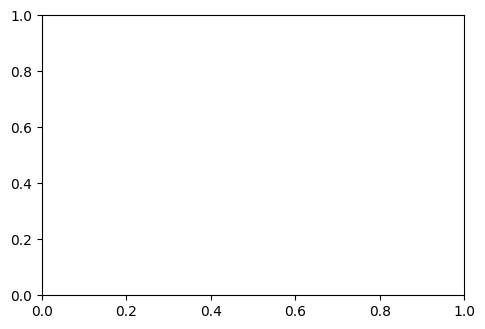

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

attributes_to_plot = ['30 to 44',
                      'Church of Scotland',
                      'Gas central heating',
                      'Economically active: Unemployed']

plt.figure(figsize=(12, 8))

for i, attribute in enumerate(attributes_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(x=merged_data[attribute])
    plt.title(attribute)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

attributes_to_plot = ['30 to 44',
                      'Church of Scotland',
                      'Gas central heating',
                      'Economically active: Unemployed']

plt.figure(figsize=(12, 8))

for i, attribute in enumerate(attributes_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(merged_data[attribute].astype(str), kde=True)
    plt.title(attribute)

plt.tight_layout()
plt.show()

### Q5. Prepare, adjust or clean the dataset addressing any missing values or outliers that could distort the clustering results.

In [ ]:
def calculate_percentages(dataframe, total_columns, value_columns):

    result_df = pd.DataFrame()

    for total_col, value_col in zip(total_columns, value_columns):
        percentage_col_name = f"{value_col}_percentage"

        if total_col not in dataframe.columns:
            raise ValueError(f"Total column '{total_col}' not found in the DataFrame.")
        # The data have several empty values, so you need to process them, forcing them to be a numeric or NaN value
        dataframe[value_col] = pd.to_numeric(dataframe[value_col], errors='coerce')
        dataframe[total_col] = pd.to_numeric(dataframe[total_col], errors='coerce')
        
        result_df[percentage_col_name] = (dataframe[value_col] / dataframe[total_col]) * 100

    return result_df

# List of the corresponding totals.
total_cols = ['All people aged 16 and over',
              'All people',
              'All people.1','All people.1',
              'All people aged 16 and over.1', 'All people aged 16 and over.1',
              'All households','All households',
              'All occupied household spaces', 'All occupied household spaces',
              'All people.2','All people.2',
              'All people aged 16 to 74', 'All people aged 16 to 74',
              'All people.3', 'All people.3',
              'All people aged 16 to 74 in employment','All people aged 16 to 74 in employment',
              'All people aged 16 to 74 in employment' ]
# List of the corresponding values. 
value_cols = ['All people aged 16 and over: Level 4 and above',
              '30 to 44',
              'Church of Scotland',
              'No religion',
              'Single (never married or never registered a same-sex civil partnership)',
              'Married',
              'One family only: Married or same-sex civil partnership couple: With dependent children',
              'One person household: Aged under 65',
              'Gas central heating',
              'Electric (including storage heaters) central heating',
              'Males',
              'Females',
              'Economically active: Employee: Full-time',
              'Economically active: Unemployed',
              'Good health',
              'Bad health',
              'F. Construction', 'J. Information and communication', 'P. Education']

# Later we migth need to rename those columns., for now is ok...
result_dataframe = calculate_percentages(merged_data, total_cols, value_cols)

# Likely you could also do all this in Excel :D
# but what's important is you are aware of the correct total as dominator, census data can be very tricky

In [27]:
result_dataframe.head()

NameError: name 'result_dataframe' is not defined

In [ ]:
result_dataframe.shape

In [ ]:
# Concatenate the resulting tables.
concatenated_df = pd.concat([merged_data, result_dataframe], axis=1, ignore_index=False)
concatenated_df.head()

In [ ]:
concatenated_df.shape

In [ ]:
list(concatenated_df.columns)

In [ ]:
# Subsetting the attributes we need, we dont need the total for now.
keep_cols= [
    'code',
    'Popcount',
    'HHcount',
    'DataZone',
    'geometry',
    'All people aged 16 and over: Level 4 and above_percentage',
     '30 to 44_percentage',
     'Church of Scotland_percentage',
     'No religion_percentage',
     'Single (never married or never registered a same-sex civil partnership)_percentage',
     'Married_percentage',
     'One family only: Married or same-sex civil partnership couple: With dependent children_percentage',
     'One person household: Aged under 65_percentage',
     'Gas central heating_percentage',
     'Electric (including storage heaters) central heating_percentage',
     'Males_percentage',
     'Females_percentage',
     'Economically active: Employee: Full-time_percentage',
     'Economically active: Unemployed_percentage',
     'Good health_percentage',
     'Bad health_percentage',
     'F. Construction_percentage',
     'J. Information and communication_percentage',
     'P. Education_percentage'
]

glasglow_census_data = concatenated_df[keep_cols]

In [ ]:
glasglow_census_data.head()

In [ ]:
# For more easy manipulation we define short column names
short_column_names = {
    'All people aged 16 and over: Level 4 and above_percentage': 'Edu_Level4',
    '30 to 44_percentage': '30to44',
    'Church of Scotland_percentage': 'Ch_of_Scot',
    'No religion_percentage': 'No_Religion',
    'Single (never married or never registered a same-sex civil partnership)_percentage': 'Single',
    'Married_percentage': 'Married',
    'One family only: Married or same-sex civil partnership couple: With dependent children_percentage': 'Family_With_Children',
    'One person household: Aged under 65_percentage': 'Family_1Person',
    'Gas central heating_percentage': 'Gas_Heating',
    'Electric (including storage heaters) central heating_percentage': 'Electric_Heating',
    'Males_percentage': 'Males',
    'Females_percentage': 'Females',
    'Economically active: Employee: Full-time_percentage': 'Emp_FullTime',
    'Economically active: Unemployed_percentage': 'Unemployed',
    'Good health_percentage': 'Good_Health',
    'Bad health_percentage': 'Bad_Health',
    'F. Construction_percentage': 'Construction',
    'J. Information and communication_percentage': 'Info_Comm',
    'P. Education_percentage': 'Education'
}

glasglow_census_data = glasglow_census_data.rename(columns=short_column_names)

In [ ]:
glasglow_census_data.head()

In [ ]:
glasglow_census_data.info()

### Q6. Include standardisation between areas and variables. Make an appropriate analysis and adjust the variable selection accordingly for any multicollinearity.

In [ ]:
# Calculate z-score for each column, but we need to initially filter only the float attributes.
# bcs you can't calculate that for the OA code.. :P

numeric_columns = glasglow_census_data.select_dtypes(include='float64')
z_score_df = (numeric_columns - numeric_columns.mean()) / numeric_columns.std(ddof=0)
z_score_df.head()

In [ ]:
z_score_df.shape

In [ ]:
corr = z_score_df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(z_score_df.corr())
plt.show()

In [ ]:
threshold = 0.7 # We can adapt this based on waht we have in our data. Recall the subjetivity issue?
# So if we include .8 then we wont be able to reduce any variables., so I took the threshold to 70%

highly_correlated = (corr.abs() > threshold) & (corr.abs() < 1.0)

plt.figure(figsize=(10, 8))
sns.heatmap(highly_correlated, cmap='coolwarm', cbar=False, annot=True)

plt.title('Highly Correlated Variables')
plt.show()

# The plot will represent  BINARY table 0 for false( out of the threshold) and 1 for above the threshold.
# but I also coloured so it is easier to use and cute :) 

In [ ]:
z_score_df.info()

In [ ]:
z_score_df.drop(['Family_With_Children', 'Gas_Heating', 'Single'], axis=1, inplace=True)
z_score_df.info()

In [ ]:
corr_2 = z_score_df.corr()
corr_2.style.background_gradient(cmap='coolwarm')

In [ ]:
threshold = 0.7
highly_correlated_2 = (corr_2.abs() > threshold) & (corr_2.abs() < 1.0)

plt.figure(figsize=(10, 8))
sns.heatmap(highly_correlated_2, cmap='coolwarm', cbar=False, annot=True)

plt.title('New Highly Correlated Variables')
plt.show()

In [ ]:
contains_nan = z_score_df.isna().any().any()

if contains_nan:
    print("Oh no :( the DataFrame contains NaN values.")
else:
    print("Wahoo! the dataFrame does not contain NaN values. I'm the best")

In [ ]:
z_score_df.fillna(z_score_df.mean(), inplace=True)

In [ ]:
z_score_df.head()

In [ ]:
z_score_df.shape

### Q7. Utilize the k-means clustering algorithm to create a classification based on the selected variables.

In [ ]:
?KMeans

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist

# KMeans with 10 clusters
kmeans = KMeans(n_clusters=10)
kmeans.fit(z_score_df)
labels = kmeans.predict(z_score_df)
cluster_centres = kmeans.cluster_centers_
z_score_df['Cluster'] = kmeans.labels_

In [ ]:
z_score_df.head()

In [ ]:
plt.hist(labels)
# Ok, we clustered the data, but we subjectively defined the number of clusters, 
# and as you can see is one of the key parameters

### Q8. Define the optimum number of clusters (i.e., using the Elblow method). Experiment with different values of k.

In [ ]:
Sum_of_squared_distances = []

K_range = range(1,15)

for k in K_range:
 km = KMeans(n_clusters=k)
 km = km.fit(z_score_df)
 Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K_range, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
import numpy as np
def elbow(dataframe, n):
    kMeansVar = [KMeans(n_clusters=k).fit(dataframe.values) for k in range(1, n)] #making use of list comprehensions.
    centroids = [X.cluster_centers_ for X in kMeansVar]
    k_euclid = [cdist(dataframe.values, cent) for cent in centroids]
    dist = [np.min(ke, axis=1) for ke in k_euclid]
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(dataframe.values)**2)/dataframe.values.shape[0]
    bss = tss - wcss
    plt.plot(bss)
    plt.show()
 
elbow(z_score_df,15)

In [ ]:
# KMeans with 6 clusters, after the validation with the Elbow method.
kmeans = KMeans(n_clusters=6)
kmeans.fit(z_score_df)
labels = kmeans.predict(z_score_df)
cluster_centres = kmeans.cluster_centers_

z_score_df['Cluster'] = kmeans.labels_

In [ ]:
z_score_df.head()

### Q9. Evaluate your cluster groups (e.g., using PCA) and interpret your cluster centres. Describe your results and repeat the process to adjust the variable selection and cluster groups to provide more meaningful results for your geodemographic goal. Interpret the characteristics of each cluster. What demographic patterns or similarities are prevalent within each group?

In [ ]:
# Code based on the example provided here: 
# https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html#sphx-glr-auto-examples-decomposition-plot-pca-iris-py

import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

plt.figure(figsize=(12, 8))

kmeans = KMeans(n_clusters=6)
clusters = kmeans.fit_predict(z_score_df)

z_score_df['Cluster'] = clusters

scaler = StandardScaler()
stand_data_scaled = scaler.fit_transform(z_score_df)

# PCA analysys.
pca = PCA(n_components=2).fit(stand_data_scaled)
pca_result = pca.transform(stand_data_scaled)

#Percentage of variance explained by each of the selected components.
variance_ratio = pca.explained_variance_ratio_

# Create a scatter plot
fig = px.scatter(x=pca_result[:, 0], y=pca_result[:, 1], color=clusters,
                 labels={'color': 'Cluster'},
                 #title='Cluster Plot against 1st 2 Principal Components',
                 opacity=0.7,
                 width=800, 
                 height=800)

plt.tight_layout()
fig.show()

print(f"These two components explain {(variance_ratio.sum()*100):.2f}% of the point variability.")


In [ ]:
# Here is a static figure with the point variability included in the x/y-axis label.
# So we can see what variability is provided by each component.

kmeans = KMeans(n_clusters=6)
clusters = kmeans.fit_predict(z_score_df)

z_score_df['Cluster'] = clusters

# Standardize the data for PCA
scaler = StandardScaler()
stand_data_scaled = scaler.fit_transform(z_score_df)

# PCA
pca = PCA(n_components=2).fit(stand_data_scaled)
pca_result = pca.transform(stand_data_scaled)

#Percentage of variance explained by each of the selected components.
variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=clusters, palette='viridis', s=50, alpha=0.7)
plt.title('Cluster Plot against 1st 2 Principal Components')
plt.xlabel(f'Principal Component 1 variation: {variance_ratio[0]*100:.2f}%')
plt.ylabel(f'Principal Component 2 variation: {variance_ratio[1]*100:.2f}%')
plt.legend(title='Clusters')
plt.show()


In [ ]:
# KMeans clustering
kmeans = KMeans(n_clusters=6)
clusters = kmeans.fit_predict(z_score_df)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_


# Get the cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=z_score_df.columns)

# Create a new DataFrame with cluster assignments and column names
#result_df = pd.DataFrame({'Cluster': clusters, 'Column': z_score_df.columns})

cluster_centers.head(6)

In [ ]:
# Code adapted from:
# https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_demo.html

first_row_centers = cluster_centers.iloc[0, :]

# len of features
num_features = len(first_row_centers)

# polar coordinates
theta = np.linspace(0, 2 * np.pi, num_features, endpoint=True)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, first_row_centers, linewidth=1, color='blue', marker='o', label='Centers')
# Add an extra red line at the 0.0 value
ax.plot(theta, np.zeros_like(first_row_centers), color='red', linestyle='--', label='Avarage')

ax.set_xticks(theta)
ax.set_xticklabels(cluster_centers.columns, rotation=45, ha='right')

plt.show()
#Ignore the cluster polar values, and focus in he census variables.

### Q10. Map the final cluster groups

In [ ]:
list(z_score_df.columns)

In [ ]:
z_score_df.drop([
 'Edu_Level4',
 '30to44',
 'Ch_of_Scot',
 'No_Religion',
 'Married',
 'Family_1Person',
 'Electric_Heating',
 'Males',
 'Females',
 'Emp_FullTime',
 'Unemployed',
 'Good_Health',
 'Bad_Health',
 'Construction',
 'Info_Comm',
 'Education'], axis=1, inplace=True)
z_score_df.info()

In [ ]:
# Concatenate the resulting tables.
final_df = pd.concat([glasglow_census_data, z_score_df], axis=1, ignore_index=False)
final_df.head()

In [ ]:
final_df.columns

In [ ]:
final_df.explore(column='Cluster', cmap='Set1', tiles='CartoDB positron')

### Q11. Finish the analysis by naming the final clusters and plotting a final map that includes the census values and the provided names.

### Q12. Finally, acknowledge the subjective nature of classification and make analytical decisions to produce an optimum classification for your specific purpose. Reflect on the challenges and insights gained during the classification process. Ensure you document your analytical decisions and the rationale behind any important decision. Once your geodemographics are constructed, describe the potential use cases for the geodemographic classification you have built based on your initial goal.

# Lab No 7: Spatial Microsimulation (3 Challenges)

## Challenge 1: 

## Challenge 2: 

## Challenge 3: 

# Final Remarks (limitations, barriers, and any additional comments)